Lambda School Data Science

*Unit 4, Sprint 1, Module 4*

---

# Topic Modeling (Prepare)


# Latent Dirchilet Allocation Models (Learn)
<a id="#p1"></a>

## Overview
LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Follow Along

## Challenge 

# Estimating LDA Models with Gensim (Learn)
<a id="#p1"></a>

## Overview
### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [2]:
path = './data/austen-brontë-split'

### Text Preprocessing
**Activity**: update the function `tokenize` with any technique you have learned so far this week. 

In [3]:
# 1) Plain Python - ''.split command
# 2) Spacy - just the lemmas from the document
# 3) Gensim - simple_preprocess

def tokenize(text):
    "Complete this function"
    
    return [token for token in simple_preprocess(text) if token in STOPWORDS]

In [4]:
import os

def gather_data(path_to_data): 
    data = []
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    data.append(tokenize(str(text)))       
    return data

In [5]:
tokens = gather_data(path)

In [6]:
tokens[0][0:10]

['she', 'found', 'that', 'he', 'was', 'only', 'his', 'an', 'of', 'the']

In [ ]:
"this is a sample string with a \n newline character".replace('\n', '')

In [ ]:
df['tokens'].head()

## Follow Along

In [7]:
titles = [t[:-4] for t in os.listdir(path) if os.path.isdir(t) == False]

In [8]:
len(titles)

813

In [9]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [10]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

In [11]:
len(tokens)

813

### Author DataFrame


In [12]:
df = pd.DataFrame(index=titles, data={'tokens':tokens})

In [13]:
df.head()

,tokens
Austen_Emma0026,"[she, found, that, he, was, only, his, an, of,..."
Austen_Emma0032,"[so, very, much, that, if, it, were, to, any, ..."
CBronte_Villette0086,"[the, there, the, on, the, but, where, was, th..."
CBronte_Jane0099,"[by, and, one, of, his, and, she, could, not, ..."
CBronte_Villette0092,"[on, the, the, first, the, of, not, what, as, ..."


In [14]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [15]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [16]:
df.author.value_counts()

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [17]:
def doc_stream(path):
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    tokens = tokenize(str(text))
                yield tokens

In [24]:
streaming_data = doc_stream(path)

In [23]:
next(streaming_data)

['joke',
 'queer',
 'looks',
 'tell',
 'thing',
 'specially',
 'surprised',
 'journeyings',
 'backward',
 'forward',
 'visits',
 'ingram',
 'park',
 'sure',
 'miles',
 'borders',
 'county',
 'distance',
 'ardent',
 'lover',
 'practised',
 'indefatigable',
 'horseman',
 'rochester',
 'morning',
 'ride',
 'began',
 'cherish',
 'hopes',
 'right',
 'conceive',
 'match',
 'broken',
 'rumour',
 'mistaken',
 'parties',
 'changed',
 'minds',
 'look',
 'master',
 'face',
 'sad',
 'fierce',
 'remember',
 'time',
 'uniformly',
 'clear',
 'clouds',
 'evil',
 'feelings',
 'moments',
 'pupil',
 'spent',
 'lacked',
 'spirits',
 'sank',
 'inevitable',
 'dejection',
 'gay',
 'called',
 'frequently',
 'presence',
 'kinder',
 'alas',
 'loved',
 'chapter',
 'xxiii',
 'splendid',
 'midsummer',
 'shone',
 'england',
 'skies',
 'pure',
 'suns',
 'radiant',
 'seen',
 'long',
 'succession',
 'seldom',
 'favour',
 'singly',
 'wave',
 'girt',
 'land',
 'band',
 'italian',
 'days',
 'come',
 'south',
 'like',
 'f

In [ ]:
# gather_data => returns a list
# doc_stream => returns a generator

In [ ]:
next(streaming_data) # Returns one document at a time from the generator

### Gensim LDA Topic Modeling

In [25]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [27]:
id2word.token2id['england']

869

In [28]:
id2word[869]

'england'

In [29]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(869, 3), (1254, 1), (2485, 1), (16850, 1)]

In [30]:
import sys
sys.getsizeof(id2word)

56

In [31]:
len(id2word.keys())

22095

In [32]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [33]:
len(id2word.keys())

8102

In [34]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the doc_stream f(x)
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [36]:
corpus[345][:10]

[(4, 1),
 (17, 1),
 (28, 1),
 (30, 1),
 (31, 2),
 (40, 1),
 (46, 1),
 (51, 1),
 (55, 1),
 (71, 1)]

In [37]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=8
                  )

In [38]:
lda.print_topics()

[(0,
  '0.009*"pounds" + 0.007*"mother" + 0.006*"sure" + 0.006*"think" + 0.006*"year" + 0.004*"rochester" + 0.004*"certainly" + 0.004*"thornfield" + 0.004*"fairfax" + 0.004*"live"'),
 (1,
  '0.008*"pelet" + 0.005*"thought" + 0.005*"like" + 0.004*"little" + 0.004*"man" + 0.004*"hunsden" + 0.004*"time" + 0.003*"having" + 0.003*"pupils" + 0.003*"crimsworth"'),
 (2,
  '0.008*"madame" + 0.006*"little" + 0.006*"like" + 0.004*"day" + 0.004*"vous" + 0.004*"thought" + 0.003*"know" + 0.003*"beck" + 0.003*"good" + 0.003*"paul"'),
 (3,
  '0.005*"night" + 0.005*"look" + 0.005*"like" + 0.004*"old" + 0.004*"est" + 0.004*"looked" + 0.003*"sir" + 0.003*"thought" + 0.003*"house" + 0.003*"hunsden"'),
 (4,
  '0.007*"little" + 0.005*"madame" + 0.005*"like" + 0.004*"thought" + 0.004*"know" + 0.004*"hand" + 0.004*"good" + 0.004*"night" + 0.003*"day" + 0.003*"dr"'),
 (5,
  '0.017*"elizabeth" + 0.013*"darcy" + 0.010*"miss" + 0.010*"bingley" + 0.010*"bennet" + 0.009*"jane" + 0.007*"know" + 0.007*"think" + 0.006

In [39]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [40]:
topics = [' '.join(t[0:5]) for t in words]

In [41]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
pounds mother sure think year

------ Topic 1 ------
pelet thought like little man

------ Topic 2 ------
madame little like day vous

------ Topic 3 ------
night look like old est

------ Topic 4 ------
little madame like thought know

------ Topic 5 ------
elizabeth darcy miss bingley bennet

------ Topic 6 ------
know jane life like long

------ Topic 7 ------
frances monsieur hunsden little english

------ Topic 8 ------
good little like emma elton

------ Topic 9 ------
sir long jane rochester little

------ Topic 10 ------
like little rochester miss room

------ Topic 11 ------
emma miss harriet thing weston

------ Topic 12 ------
jane emma little thing miss

------ Topic 13 ------
elinor marianne sister mother time

------ Topic 14 ------
monsieur henri georgiana mdlle little



## Challenge 

You will apply an LDA model to a customer review dataset to practice the fitting and estimation of LDA. 

# Interpret LDA Results (Learn)
<a id="#p3"></a>

## Overview

## Follow Along

### Topic Distance Visualization

In [42]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [43]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.045594  0.020556       1        1  21.411926
4     -0.077666  0.055243       2        1  17.607483
11     0.141289  0.008634       3        1  16.260637
13     0.104043  0.014424       4        1  16.003149
5      0.152210  0.012564       5        1  10.043459
6     -0.013860  0.051119       6        1   6.805943
2     -0.077657  0.072671       7        1   3.625703
1     -0.033809  0.047089       8        1   2.328252
7     -0.071730  0.053930       9        1   1.555922
12     0.095364 -0.031605      10        1   1.282468
8      0.052509 -0.003885      11        1   1.224832
9      0.006459 -0.050557      12        1   0.866365
3     -0.099428 -0.027452      13        1   0.458793
0     -0.046036 -0.148618      14        1   0.262597
14    -0.086092 -0.074113      15        1   0.262477, topic_info=     Category         Freq          Term        Total  loglift  logprob
90    Default   836.000000          emma   836.000000  30.0000  30.0000
177   Default  1711.000000        little  1711.000000  29.0000  29.0000
848   Default   931.000000          jane   931.000000  28.0000  28.0000
1131  Default  1535.000000          miss  1535.000000  27.0000  27.0000
414   Default  1318.000000          like  1318.000000  26.0000  26.0000
495   Default  1312.000000         think  1312.000000  25.0000  25.0000
1641  Default   657.000000     elizabeth   657.000000  24.0000  24.0000
1197  Default   596.000000           sir   596.000000  23.0000  23.0000
387   Default  1349.000000          good  1349.000000  22.0000  22.0000
271   Default   776.000000         thing   776.000000  21.0000  21.0000
169   Default  1437.000000          know  1437.000000  20.0000  20.0000
913   Default   357.000000     rochester   357.000000  19.0000  19.0000
195   Default   672.000000        mother   672.000000  18.0000  18.0000
272   Default  1136.000000       thought  1136.000000  17.0000  17.0000
681   Default   920.000000         shall   920.000000  16.0000  16.0000
134   Default   510.000000       harriet   510.000000  15.0000  15.0000
1297  Default   361.000000       fairfax   361.000000  14.0000  14.0000
2119  Default   424.000000         darcy   424.000000  13.0000  13.0000
702   Default   614.000000          sure   614.000000  12.0000  12.0000
89    Default   370.000000         elton   370.000000  11.0000  11.0000
496   Default  1315.000000          time  1315.000000  10.0000  10.0000
2721  Default   695.000000        elinor   695.000000   9.0000   9.0000
2745  Default   576.000000      marianne   576.000000   8.0000   8.0000
179   Default   934.000000          long   934.000000   7.0000   7.0000
509   Default   427.000000        weston   427.000000   6.0000   6.0000
351   Default  1058.000000           day  1058.000000   5.0000   5.0000
562   Default   587.000000          dear   587.000000   4.0000   4.0000
434   Default   622.000000         night   622.000000   3.0000   3.0000
2485  Default   272.000000      monsieur   272.000000   2.0000   2.0000
148   Default   753.000000         house   753.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
2198  Topic15     1.191029      capacity    21.045624   3.0709  -6.5378
1831  Topic15     2.633766  mademoiselle   114.244507   2.1728  -5.7442
1653  Topic15     1.194112      firmness    22.450764   3.0088  -6.5352
1906  Topic15     1.775600        accent    53.255692   2.5418  -6.1385
5422  Topic15     1.162497         hints    21.797066   3.0116  -6.5620
6008  Topic15     1.547797      pictures    41.826511   2.6461  -6.2758
1251  Topic15     2.444135          book   166.297684   1.7227  -5.8189
1640  Topic15     1.620805         eliza    60.185501   2.3283  -6.2297
2087  Topic15     1.125771        volume    23.958714   2.8849  -6.5941
1138  Topic15     2.362336       natural   183.846329   1.5883  -5.8529
318   Topic15  

### Overall Model / Documents

In [44]:
lda[corpus[0]]

[(10, 0.13784581), (11, 0.7755074), (13, 0.084544025)]

In [45]:
distro = [lda[d] for d in corpus]

In [46]:
distro[0]

[(10, 0.13785432), (11, 0.7755409), (13, 0.08450204)]

In [47]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [48]:
len(new_distro)

813

In [49]:
df.head()

,tokens,author,book,section
Austen_Emma0026,"[she, found, that, he, was, only, his, an, of,...",1,Emma,26
Austen_Emma0032,"[so, very, much, that, if, it, were, to, any, ...",1,Emma,32
CBronte_Villette0086,"[the, there, the, on, the, but, where, was, th...",0,Villette,86
CBronte_Jane0099,"[by, and, one, of, his, and, she, could, not, ...",0,Jane,99
CBronte_Villette0092,"[on, the, the, first, the, of, not, what, as, ...",0,Villette,92


In [50]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [51]:
df.head()

,pounds mother sure think year,pelet thought like little man,madame little like day vous,night look like old est,little madame like thought know,elizabeth darcy miss bingley bennet,know jane life like long,frances monsieur hunsden little english,good little like emma elton,sir long jane rochester little,like little rochester miss room,emma miss harriet thing weston,jane emma little thing miss,elinor marianne sister mother time,monsieur henri georgiana mdlle little,author
Austen_Emma0026,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.137813,0.775376,0.0,0.084708,0.0,Austen
Austen_Emma0032,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.997455,0.0,0.000000,0.0,Austen
CBronte_Villette0086,0.0,0.0,0.0,0.0,0.215017,0.000000,0.782771,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,CBronte
CBronte_Jane0099,0.0,0.0,0.0,0.0,0.000000,0.000000,0.522729,0.0,0.0,0.0,0.473159,0.000000,0.0,0.000000,0.0,CBronte
CBronte_Villette0092,0.0,0.0,0.0,0.0,0.561909,0.027238,0.000000,0.0,0.0,0.0,0.370953,0.038246,0.0,0.000000,0.0,CBronte


In [52]:
df.groupby('author').mean()

,pounds mother sure think year,pelet thought like little man,madame little like day vous,night look like old est,little madame like thought know,elizabeth darcy miss bingley bennet,know jane life like long,frances monsieur hunsden little english,good little like emma elton,sir long jane rochester little,like little rochester miss room,emma miss harriet thing weston,jane emma little thing miss,elinor marianne sister mother time,monsieur henri georgiana mdlle little
author,,,,,,,,,,,,,,,
Austen,0.002680,0.005265,0.000558,0.000027,0.002224,0.229068,0.005129,0.000833,0.016319,0.005213,0.014229,0.352142,0.023068,0.340476,0.000000
CBronte,0.002808,0.035886,0.061154,0.008203,0.298078,0.005798,0.123300,0.026866,0.007873,0.012273,0.385653,0.005757,0.004657,0.014485,0.004485


## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Overview

## Follow Along

In [53]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [ ]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=100)

In [55]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [56]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-0.629706,2,0
1,-0.737218,8,0
2,-0.723231,14,0
3,-0.761870,20,0
4,-0.795913,26,0


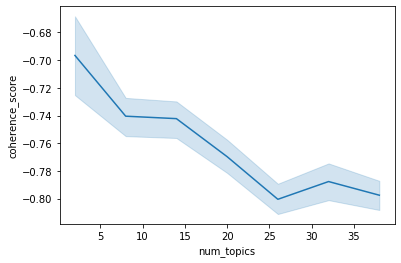

In [58]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
lda[id2word.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow

In [ ]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [ ]:
test = "Ned asked me a question about England today."

In [ ]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
def doc_stream(path):
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            with open(os.path.join(path,f)) as t:
                text = t.read().strip('\n')
                yield text

def get_people(docstream):
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.lemma_)
                
    return set(ppl)

In [ ]:
%pwd

In [ ]:
people = get_people(doc_stream(path))

In [ ]:
list(people)[:50]

In [ ]:
gender_lookup = {'Adele':'female_charc', 'William Crimsworth':'male_charc'}

In [ ]:
doc = nlp(next(doc_stream(path)))

In [ ]:
doc.ents[0].lemma_

# Sources

### *References*
* [Andrew Ng et al paper on LDA](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)
* On [Coherence](https://pdfs.semanticscholar.org/1521/8d9c029cbb903ae7c729b2c644c24994c201.pdf)

### *Resources*

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)